# ASSIGNMENT 1
# Allan Robey - 22111007
# Kush Shah - 22111033

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2

## QUESTION 1: Loading the data set

In [13]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

for i in range(5):
    globals()[f'dict{i+1}'] =  unpickle('data_batch_'+str(i+1))

test_batch_dict = unpickle('test_batch')


# Creating an image

In [17]:
# train_data consists of all 50,000 images.
train_data = []
for i in range(1,6,1):
    for j in range(10000):
        train_data.append(eval("dict"+str(i))[b'data'][j])

In [19]:
# train_data_labels consists of labels of  50,000 images.
train_data_labels = []
for i in range(1,6,1):
    for j in range(10000):
        train_data_labels.append(eval("dict"+str(i))[b'labels'][j])

In [20]:
# test_data consists of 10,000 images and test_data_labels consists of the corresponding labels
test_data = []
test_data_labels = []
for i in range(10000):
        test_data.append(test_batch_dict[b'data'][i])
for i in range(10000):
        test_data_labels.append(test_batch_dict[b'labels'][i])

In [15]:
# function to create an image

def image_formation(image_array):
    np_image_array = np.array(image_array)
    image = image_array.reshape(3,32,32).transpose(1,2,0)
    return image


<function matplotlib.pyplot.show(close=None, block=None)>

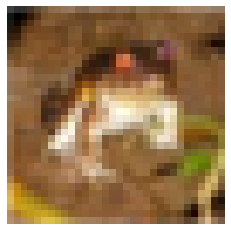

In [44]:
#showing the image 0
image = image_formation(train_data[0])
plt.imshow(image)
plt.axis('off')
plt.show

In [21]:
len(train_data)

50000

In [22]:
len(train_data_labels)

50000

In [23]:
len(test_data)

10000

In [24]:
len(test_data_labels)

10000

## creating pickle file for unaugmented data set

In [25]:
# making train & test data pickle file to maintain reusability 
with open('train_data.pkl', 'wb') as file:
      
    
    pickle.dump(train_data, file)
    
with open('test_data.pkl', 'wb') as file:
      
    
    pickle.dump(test_data, file)

In [26]:
# making train & test data lables pickle file to maintain reusability
with open('train_data_labels.pkl', 'wb') as file:
      
    
    pickle.dump(train_data_labels, file)
    
with open('test_data_labels.pkl', 'wb') as file:
      
    
    pickle.dump(test_data_labels, file)
    


# QUESTION 2:Implement Image Transformation Methods

# ENHANCEMENT OF IMAGE

In [27]:
# method to enhance the image 
def image_enhancement(image_array):
    np_image_array = np.array(image_array)
    #calculating max, min among all threee channels i.e Red, Green,Blue 
    red_min = np.min(np_image_array[0:1024])
    red_max = np.max(np_image_array[0:1024])
    green_min = np.min(np_image_array[1024:2048])
    green_max = np.max(np_image_array[1024:2048])
    blue_min = np.min(np_image_array[2048:3072])
    blue_max = np.max(np_image_array[2048:3072])
    for i in range(1024):
        np_image_array[i] = ((np_image_array[i] - red_min) / (red_max -red_min )) * 255
    for j in range(1024,2048,1):
        np_image_array[j] = ((np_image_array[j] - green_min) / (green_max -green_min )) * 255
    for k in range(2048,3072,1):
        np_image_array[k] = ((np_image_array[k] - blue_min) / (blue_max -blue_min )) * 255
    image = np_image_array.reshape(3,32,32).transpose(1,2,0)
    return image

Text(0.5, 1.0, 'ENHANCED IMAGE')

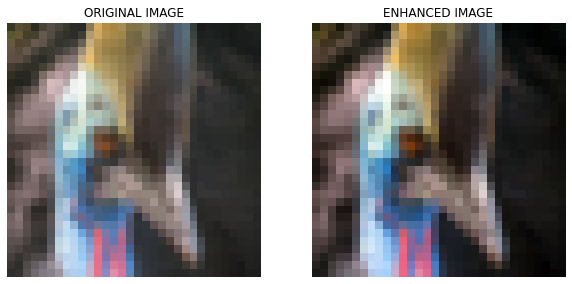

In [34]:
#randomly selecting the image & comparing enchanced and original image
image_id = random.randint(0,50000)
original_image = image_formation(train_data[image_id])
enhanced_image = image_enhancement(train_data[image_id])
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(original_image)
plt.axis('off')
plt.title("ORIGINAL IMAGE")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(enhanced_image)
plt.axis('off')
plt.title("ENHANCED IMAGE")

# POSTERIZATION OF IMAGE

Posterization of Image (A posterizing image is the one in which you reduce the number of
colors in the image to provide a visual art). Follow the instructions below to posterize the
image:
• Select a desired minimum and maximum pixel value in the range of [0-255].
• Now, for each pixel i in image x:
i. Calculate the range r by subtracting selected minimum and maximum pixel value
ii. Get a divider for the colors using divider =
255
r
iii. Get the level of colors by i =
i
divider
iv. Finally, apply the color palette on pixel by i = i + min
• Make sure, the final image x should have the pixel values in the range of [0, 255]


In [35]:
# method for posterization 
def image_posterization(image_array):
    min1 = 7
    max1 = 253
    range1 = max1 - min1
    divider = 255/range1
    np_image_array = np.array(image_array)
    for i in range(len(image_array)):
        np_image_array[i] = np_image_array[i]/divider
        x = np_image_array[i] + min1
        if(x < 0):
            np_image_array[i] = 0
        elif x > 255:
            np_image_array[i] = 255
        else:
            np_image_array[i] = x
    image = np_image_array.reshape(3,32,32).transpose(1,2,0)
    return image

Text(0.5, 1.0, 'POSTERIZED IMAGE')

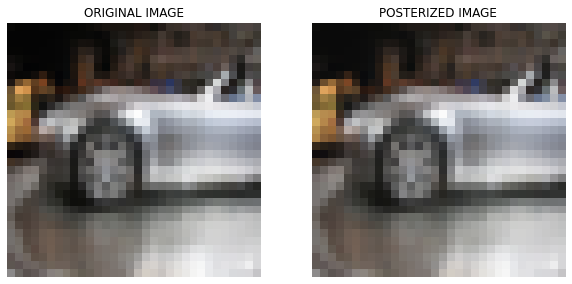

In [36]:
#randomly selecting the image & comparing posterized and original image
image_id = random.randint(0,50000)
original_image = image_formation(train_data[image_id])
posterized_image = image_posterization(train_data[image_id])
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(original_image)
plt.axis('off')
plt.title("ORIGINAL IMAGE")
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(posterized_image)
plt.axis('off')
plt.title("POSTERIZED IMAGE")

# ROTATATION OF IMAGE

In [37]:
import math
#method for rotating the image 
def image_rotate(image):
    
    image=image_formation(image)
    #randomly selecting angle(from -180 to 180 degree) to rotate the image
    angle=random.uniform(-180, 180)
    # converting the degree into radians
    angle = math.radians(angle)

    rotated_image = np.uint8(np.zeros(image.shape))

    rows = rotated_image.shape[0]
    cols  = rotated_image.shape[1]

    centre_x,centre_y = (cols//2, rows//2)

    for i in range(rows):
        for j in range(cols):
            x= (i-centre_x)*math.cos(angle)+(j-centre_y)*math.sin(angle)
            y= -(i-centre_x)*math.sin(angle)+(j-centre_y)*math.cos(angle)

            x=round(x)+centre_x 
            y=round(y)+centre_y 

            if (x>=0 and y>=0 and x<image.shape[0] and  y<image.shape[1]):
                rotated_image[i,j,:] = image[x,y,:]

    return rotated_image


Text(0.5, 1.0, 'ROTATED IMAGE')

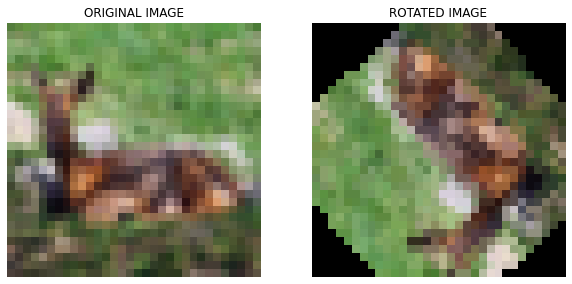

In [43]:
#randomly selecting the image & comparing rotated and original image
image_id = random.randint(0,50000)
original_image = image_formation(train_data[image_id])
rotated_image = image_rotate(train_data[image_id])
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
  
# showing original image
plt.imshow(original_image)
plt.axis('off')
plt.title("ORIGINAL IMAGE")
fig.add_subplot(1, 2, 2)
  
# showing rotated image
plt.imshow(rotated_image)
plt.axis('off')
plt.title("ROTATED IMAGE")

# CONTRAST AND HORIZONTAL FLIPPING OF IMAGE

In [48]:
import random  
# method for contrasting & flipping the image  
def image_contrast_horizontal_flip(image_array):
    
    alpha = random.uniform(0.5, 2.0)
    np_image_array = np.array(image_array)
    #contrast
    for i in range(len(image_array)):
        pixel = alpha * (np_image_array[i] - 128) + 128
        if pixel < 0:
            np_image_array[i] = 0
        elif pixel > 255:
            np_image_array[i] = 255
        else:
            np_image_array[i] = pixel
    image = np_image_array.reshape(3,32,32).transpose(1,2,0)
    
    if random.randint(0,1) == 1:
        
        for i in range(image.shape[0]):
            #flipped_image = np.fliplr(image)
            flipped_image = image[:, ::-1, :]
            flipped_image = np.uint8(flipped_image)
    else:
        flipped_image = image
    return flipped_image



Text(0.5, 1.0, 'CONTRAST AND HORIZONTALLY FLIPPED IMAGE')

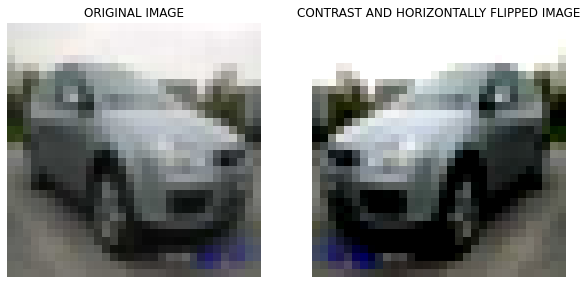

In [47]:
#randomly selecting the image & comparing rotated and original image
image_id = random.randint(0,50000)
original_image = image_formation(train_data[image_id])
contrast_image = image_contrast_horizontal_flip(train_data[image_id])
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
  
# showing original image
plt.imshow(original_image)
plt.axis('off')
plt.title("ORIGINAL IMAGE")
fig.add_subplot(1, 2, 2)
  
# showing contrast image
plt.imshow(contrast_image)
plt.axis('off')
plt.title("CONTRAST AND HORIZONTALLY FLIPPED IMAGE")

# QUESTION 3

# creating augmented data Set

In [ ]:
#creating augmented data set 
train_aug_data=[]
for i  in range(len(train_data)):
    train_aug_data.append(image_formation(train_data[i]).transpose(2,0,1))
    
#randomly selecting the tranformatio to be performed on the image
for i in range(len(train_data)):
    #randomly selecting the tranformation to be performed on the image
    temp=random.randint(0,4)
    if(temp==0):
        train_aug_data.append(image_enhancement(train_data[i]).transpose(2,0,1))
    elif(temp==1):
        train_aug_data.append(image_posterization(train_data[i]).transpose(2,0,1))
    elif(temp==2):
        train_aug_data.append(image_contrast_horizontal_flip(train_data[i]).transpose(2,0,1))
    else:
        train_aug_data.append(image_rotate(train_data[i]).transpose(2,0,1))
        
    

In [ ]:
#creating np array
train_aug_data = np.array(train_aug_data)

In [ ]:
#making augmented training data lables
train_aug_labels = train_data_labels

for i in range(len(train_data_labels)):
    train_aug_labels.append(train_data_labels[i])
    

In [ ]:
#making augmented test data  
test_aug_data=[]
for i  in range(len(test_data)):
    test_aug_data.append(image_formation(test_data[i]).transpose(2,0,1))
    
for i in range(len(test_data)):
    temp=random.randint(0,4)
    if(temp==0):
        test_aug_data.append(image_enhancement(test_data[i]).transpose(2,0,1))
    elif(temp==1):
        test_aug_data.append(image_posterization(test_data[i]).transpose(2,0,1))
    elif(temp==2):
        test_aug_data.append(image_contrast_horizontal_flip(test_data[i]).transpose(2,0,1))
    else:
        test_aug_data.append(image_rotate(test_data[i]).transpose(2,0,1))

In [ ]:
#creating test data labels
test_aug_labels = test_data_labels

for i in range(len(test_data_labels)):
    test_aug_labels.append(test_data_labels[i])

In [ ]:
test_aug_data = np.array(test_aug_data)

## create pickle file for augmented data set

In [ ]:
#making pickle file for training augmented data
with open('train_aug_data.pkl', 'wb') as file:
      
    
    pickle.dump(train_aug_data, file)

#making pickle file for testing augmented data
    
with open('test_aug_data.pkl', 'wb') as file:
      
    
    pickle.dump(test_aug_data, file)

In [ ]:
#making pickle file for training augmented data labels
with open('train_aug_labels.pkl', 'wb') as file:
      
    
    pickle.dump(train_aug_labels, file)

#making pickle file for test augmented data
    
with open('test_aug_labels.pkl', 'wb') as file:
      
    
    pickle.dump(test_aug_labels, file)

In [49]:
# reading the test augmented data file 
with open('test_aug_data.pkl', 'rb') as file:
	
	# Call load method to deserialze
	test_aug_data = pickle.load(file)

# reading the train augmented data file
    
with open('train_aug_data.pkl', 'rb') as file:
	
	# Call load method to deserialze
	train_aug_data = pickle.load(file)

In [50]:
train_aug_data.shape

(100000, 3, 32, 32)

In [51]:
test_aug_data.shape

(20000, 3, 32, 32)

In [52]:
# reading the test augmented data labels
with open('test_aug_labels.pkl', 'rb') as file:
	
	# Call load method to deserialze
	test_aug_labels = pickle.load(file)

# reading the train augmented data file
with open('train_aug_labels.pkl', 'rb') as file:
	
	# Call load method to deserialze
	train_aug_labels = pickle.load(file)

In [53]:
len(train_aug_labels)

100000

In [54]:
len(test_aug_labels)

20000

In [55]:
# method to convert lables into one hot vector 
def one_hot_encode(data, n_classes):
    
    encoded_labels = np.zeros((len(data), n_classes))
    for i, x in enumerate(data):
        encoded_labels[i][x] = 1
    
    return encoded_labels

In [56]:
train_aug_encoded_labels = one_hot_encode(np.array(train_aug_labels),10)

In [57]:
test_aug_encoded_labels = one_hot_encode(np.array(test_aug_labels),10)

In [58]:
# making the train augmented encoded data file
with open('train_aug_encoded_labels.pkl', 'wb') as file:
      
    
    pickle.dump(train_aug_encoded_labels, file)
    
# making the test augmented encoded data file
    
with open('test_aug_encoded_labels.pkl', 'wb') as file:
      
    
    pickle.dump(test_aug_encoded_labels, file)

In [59]:
# reading the train augmented encoded data file

with open('train_aug_encoded_labels.pkl', 'rb') as file:
	
	# Call load method to deserialze
	train_aug_encoded_labels = pickle.load(file)

# reading the train augmented encoded data file
with open('test_aug_encoded_labels.pkl', 'rb') as file:
	
	# Call load method to deserialze
	test_aug_encoded_labels = pickle.load(file)

In [60]:
train_aug_encoded_labels.shape

(100000, 10)

In [61]:
test_aug_encoded_labels.shape

(20000, 10)

# QUESTION 4: FEATURE EXTRACTION

In [62]:
#importing feature extractor file 
import feature_extractor as fe

In [63]:
#creating BBResNet18 object  
obj = fe.BBResNet18()

C:\Users\Admin\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
# method to create 1 d vector form  image
def get_features(data):
    
    n_batch=len(data)//100
    
    for i in range(n_batch):
        data_batch=data[i*100:(i+1)*100]
        temp=np.array([np.transpose(cv2.resize(np.transpose(img, (1, 2, 0)), (224, 224)), (2, 0, 1)) for img in data_batch])
        temp= np.float32(temp)
        #normalizing the data 
        temp/=255
        if i == 0:
            feature_vector_list = obj.feature_extraction(temp)
        else:
            feature_vector_list=np.append(feature_vector_list,obj.feature_extraction(temp),axis=0)
    return feature_vector_list

In [ ]:
train_feature_vec_list = get_features(train_aug_data)
test_feature_vec_list = get_features(test_aug_data)


In [ ]:
# make pickle file of train 
import pickle
 

with open('train_feature_vector.pkl', 'wb') as file:
      
    
    pickle.dump(train_feature_vec_list, file)

In [ ]:
  # make pickle file of test feature vector
with open('test_feature_vector.pkl', 'wb') as file:
      
    
    pickle.dump(test_feature_vec_list, file)

In [65]:
# read pickle file of train feature vector
with open('train_feature_vector.pkl', 'rb') as file:
    train_feature_vec_list = pickle.load(file)
# read pickle file of test feature vector
with open('test_feature_vector.pkl', 'rb') as file:
    test_feature_vec_list = pickle.load(file)

In [66]:
train_feature_vec_list.shape

(100000, 512)

In [67]:
test_feature_vec_list.shape

(20000, 512)

# QUESTION 5 AND 6 : MLP

In [2]:
with open('train_aug_encoded_labels.pkl', 'rb') as file:
    train_aug_encoded_labels = pickle.load(file)
with open('test_aug_encoded_labels.pkl', 'rb') as file:
# Call load method to deserialze
    test_aug_encoded_labels = pickle.load(file)

In [3]:
with open('train_feature_vector.pkl', 'rb') as file:
    train_feature_vec_list = pickle.load(file)
with open('test_feature_vector.pkl', 'rb') as file:
    test_feature_vec_list = pickle.load(file)

In [4]:
# This class creates a deep neural network with two hidden layers, each containing 64 neurons, and applies the ReLU activation function to each hidden layer.
# On the output layer, the softmax activation function is used.The loss is calculated using cross entropy


class MultiLayerPerceptron():
   
    parameters = {}
    gradients = {}
    
    # relu function activation function implementation
    def relu(self,x):
        return np.maximum(0, x)
    
    # softmax function activation function implementation
    def softmax(self,x):
            num=np.exp(x)
            den=np.sum(np.exp(x), axis=1).reshape(len(x), 1)
            res=num/den
            return res

    #cross entropy loss function implementation 
    def cross_entropy_loss(self,pred, actual):
            return -np.sum(actual*np.log(pred))/len(pred)

    # this function gives gradient of relu function 
    def relu_d(self,x):
            return (x > 0) * 1



    
    def __init__(self, train_data, train_labels, no_of_neurons=64):
        
        
        self.train_data = train_data
        self.train_labels = train_labels
        self.no_of_samples =len(train_data)
        self.no_of_features =  512
        self.no_of_classes = train_labels.shape[1]
        self.no_of_neurons = no_of_neurons
        
        MultiLayerPerceptron.parameters = { }
        
        # Initializing weights and biases for the network
        norm=1e3
        MultiLayerPerceptron.parameters['w_1'] = np.random.rand(self.no_of_features, self.no_of_neurons)/norm #to handle of vanishing gardient proble
        MultiLayerPerceptron.parameters['w_2'] = np.random.rand(self.no_of_neurons, self.no_of_neurons)/norm
        MultiLayerPerceptron.parameters['w_3'] = np.random.rand(self.no_of_neurons, self.no_of_classes)/norm
        MultiLayerPerceptron.parameters['b_1'] = np.zeros((self.no_of_neurons))
        MultiLayerPerceptron.parameters['b_2'] = np.zeros((self.no_of_neurons))
        MultiLayerPerceptron.parameters['b_3'] = np.zeros((self.no_of_classes))
        
        
    
    # implementing feed forward newtork 
    def feed_forwards(self, x):
        
        self.z_1 = np.matmul(x, MultiLayerPerceptron.parameters['w_1']) + MultiLayerPerceptron.parameters['b_1']
        self.a_1 = self.relu(self.z_1)
                
        self.z_2 = np.matmul(self.a_1, MultiLayerPerceptron.parameters['w_2']) + MultiLayerPerceptron.parameters['b_2']
        self.a_2 = self.relu(self.z_2)

        self.z_3 = np.matmul(self.a_2, MultiLayerPerceptron.parameters['w_3']) + MultiLayerPerceptron.parameters['b_3']
        self.softmax_z =self.softmax(self.z_3)
    
        
    # function to check accuracy
    def accuracy(self, pred, truth):
        acc=(np.argmax(truth, axis=1) == np.argmax(pred, axis=1)).mean()
        return acc
    
    #implementing back propogation 
    def back_prop(self, x, y):
        
        
        # Calculating gradients for W3(output layer)
        dL_dA3 = self.softmax_z - y 
        dA3_dW3 = self.a_2  
        dL_dW3 = np.dot(dA3_dW3.T, dL_dA3)  
        MultiLayerPerceptron.gradients['w_3'] = dL_dW3
        
        # Calculating gradients for B3(output layer)
        dL_dB3 = np.sum(dL_dA3, axis=0)
        MultiLayerPerceptron.gradients['b_3'] = dL_dB3

         # Calculating gradients for W2(hidden layer 2)
        dA2_dW2 = self.a_1  
        dL_dZ2 = np.dot(dL_dA3, MultiLayerPerceptron.parameters['w_3'].T)  
        dZ2_dA2 = self.relu_d(self.a_2)  
        dL_dA2 = np.multiply(dL_dZ2, dZ2_dA2)  
        dL_dW2 = np.dot(dA2_dW2.T, dL_dA2)  
        MultiLayerPerceptron.gradients['w_2'] = dL_dW2
        
        # Calculating gradients for B2(hidden layer 2)
        dL_dB2 = np.sum(dL_dA2, axis=0)
        MultiLayerPerceptron.gradients['b_2'] = dL_dB2

        
        
        # Calculating gradients for W1(hidden layer 1)
        dA1_dW1 = x  
        dL_dZ1 = np.dot(dL_dA2, MultiLayerPerceptron.parameters['w_2'].T)  
        dZ1_dA1 = self.relu_d(self.a_1)  
        dL_dA1 = np.multiply(dL_dZ1, dZ1_dA1)  
        dL_dW1 = np.dot(dA1_dW1.T, dL_dA1)  
        MultiLayerPerceptron.gradients['w_1'] = dL_dW1
        
        
        # Calculating gradients for B1(hidden layer 1)
        dL_dB1 = np.sum(dL_dA1, axis=0)
        MultiLayerPerceptron.gradients['b_1'] = dL_dB1
        
        
    def train(self, epoch=50, batch_size=32, learning_rate=0.01):
        
        # Finding the number of batches
        no_of_batches = self.no_of_samples//batch_size
        
        for i in range(epoch):
            
            batch_loss = 0
            batch_accuracy = 0
            for j in range(no_of_batches):
                # making batches of the training data  
                start=j*batch_size
                end=(j+1)*batch_size
                Y_train = self.train_labels[start:end]
                X_train = self.train_data[start:end]
                
                
                # Running forward pass on a Batch of data
                self.feed_forwards(X_train)
                # Runnning backward pass on a Batch of data 
                self.back_prop(X_train, Y_train)
                
                # applying gradient descent, i.e. W_new = W_old - learning_rate * gradient_W to update the weights
                MultiLayerPerceptron.parameters['w_1'] -= learning_rate * (MultiLayerPerceptron.gradients['w_1'] / batch_size)
                MultiLayerPerceptron.parameters['w_2'] -= learning_rate * (MultiLayerPerceptron.gradients['w_2'] / batch_size)
                MultiLayerPerceptron.parameters['w_3'] -= learning_rate * (MultiLayerPerceptron.gradients['w_3'] / batch_size)
                MultiLayerPerceptron.parameters['b_1'] -= learning_rate * (MultiLayerPerceptron.gradients['b_1'] / batch_size)
                MultiLayerPerceptron.parameters['b_2'] -= learning_rate * (MultiLayerPerceptron.gradients['b_2'] / batch_size)
                MultiLayerPerceptron.parameters['b_3'] -= learning_rate * (MultiLayerPerceptron.gradients['b_3'] / batch_size)
            
                
                batch_accuracy = self.accuracy(self.softmax_z, Y_train)*batch_size+batch_accuracy
                batch_loss = self.cross_entropy_loss(self.softmax_z, Y_train)*batch_size+batch_loss
                  

            # Decay learning rate after every 10 epochs
            if i+1 % 10 == 0:
                if i+1 > 1:
                    learning_rate = 0.8*learning_rate
            
            # Divide loss and accuracy by number of samples in the data
            no_of_samples = no_of_batches*batch_size
            loss = batch_loss/no_of_samples
            acc = batch_accuracy/no_of_samples

            
            if i == 0 or (i+1)%10 == 0:
                print(f'EPOCH NO: {i+1}: LOSS:  {loss:.4f}, ACCURACY : {acc*100:.4f}')
    

    def test(self, x, y):
        
        # Run forward pass on the data
        self.feed_forwards(x)

        # Calculate loss and accuracy
        loss = self.cross_entropy_loss(self.softmax_z, y)
        acc = self.accuracy(self.softmax_z, y)

        print(f'LOSS : {loss:.4f} ACCURACY : {acc*100:.4f}')

In [14]:
# Create an object for the augmented and unaugmented(original) training data
augmented_data_object = MultiLayerPerceptron(train_feature_vec_list, train_aug_encoded_labels)
unaugmented_data_object = MultiLayerPerceptron(train_feature_vec_list[:50000], train_aug_encoded_labels[:50000])
#Train the model on unaugmented data and augmented data and save model parameters
print('**********UNAUGMENTED DATA TRAINING**********')
unaugmented_data_object.train(epoch=100, batch_size=128, learning_rate=0.01)
print('**********AUGMENTED DATA TRAINING**********')
augmented_data_object.train(epoch=100, batch_size=128, learning_rate=0.01)

**********UNAUGMENTED DATA TRAINING**********
EPOCH NO: 1: LOSS:  2.3026, ACCURACY : 9.6374
EPOCH NO: 10: LOSS:  2.3025, ACCURACY : 10.4347
EPOCH NO: 20: LOSS:  1.8726, ACCURACY : 22.1114
EPOCH NO: 30: LOSS:  1.7107, ACCURACY : 27.0613
EPOCH NO: 40: LOSS:  1.5365, ACCURACY : 34.0865
EPOCH NO: 50: LOSS:  1.2214, ACCURACY : 55.8373
EPOCH NO: 60: LOSS:  0.9302, ACCURACY : 68.8061
EPOCH NO: 70: LOSS:  0.7677, ACCURACY : 74.0405
EPOCH NO: 80: LOSS:  0.6553, ACCURACY : 77.5361
EPOCH NO: 90: LOSS:  0.6016, ACCURACY : 79.1727
EPOCH NO: 100: LOSS:  0.5658, ACCURACY : 80.2664
**********AUGMENTED DATA TRAINING**********
EPOCH NO: 1: LOSS:  0.8355, ACCURACY : 70.9797
EPOCH NO: 10: LOSS:  0.7276, ACCURACY : 74.3658
EPOCH NO: 20: LOSS:  0.6869, ACCURACY : 75.7522
EPOCH NO: 30: LOSS:  0.6571, ACCURACY : 76.7606
EPOCH NO: 40: LOSS:  0.6328, ACCURACY : 77.6228
EPOCH NO: 50: LOSS:  0.6117, ACCURACY : 78.3211
EPOCH NO: 60: LOSS:  0.5928, ACCURACY : 79.0003
EPOCH NO: 70: LOSS:  0.5761, ACCURACY : 79.5765


# QUESTION 7:Classification Algorithms

In [7]:
with open('train_feature_vector.pkl', 'rb') as file:
    train_feature_vec_list = pickle.load(file)
with open('test_feature_vector.pkl', 'rb') as file:
    test_feature_vec_list = pickle.load(file)

In [8]:
with open('test_aug_labels.pkl', 'rb') as file:
    test_aug_labels = pickle.load(file)
with open('train_aug_labels.pkl', 'rb') as file:
    train_aug_labels = pickle.load(file)

In [9]:
# Load training data and labels
train_data = train_feature_vec_list 
train_labels = train_aug_labels 
# Load test data
test_data = test_feature_vec_list  
test_labels = test_aug_labels

# KNN

In [10]:
# Knn for augmented data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier()
classifier.fit(train_data, train_labels)
predictions = classifier.predict(test_data)

accuracy = accuracy_score(test_labels, predictions)
print('Accuracy on Augmented Data:', accuracy)

Accuracy on Augmented Data: 0.61505


In [10]:
# Knn for unaugmented data
classifier = KNeighborsClassifier()
classifier.fit(train_data[:50000], train_labels[:50000])
predictions = classifier.predict(test_data[:10000])

accuracy = accuracy_score(test_labels[:10000], predictions)
print('Accuracy on Unaugmented Data:', accuracy)

Accuracy on Unaugmented Data: 0.6938


# LOGISTIC REGRESSION

In [11]:
# LOGISTIC REGRESSION for augmented data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state=42,multi_class='ovr',max_iter =1000)
classifier.fit(train_data,train_labels)

predictions = classifier.predict(test_data)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy on Augmented data:', accuracy)

Accuracy on Augmented data: 0.7152


In [13]:
# LOGISTIC REGRESSION for unaugmented data
classifier = LogisticRegression(random_state=42,multi_class='ovr',max_iter =1000)
classifier.fit(train_data[:50000],train_labels[:50000])

predictions = classifier.predict(test_data[:10000])

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(test_labels[:10000], predictions)
print('Accuracy on Unaugmented data:', accuracy)

Accuracy on Unaugmented data: 0.7865


# DECISION TREE

In [12]:
# Decison tree for augmented data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(max_depth =12, random_state = 42)
classifier.fit(train_data, train_labels)

predictions = classifier.predict(test_data)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy on Augmented data:', accuracy)

Accuracy on Augmented data: 0.4309


In [16]:
# Decison tree for unaugmented data
classifier = DecisionTreeClassifier(max_depth =12, random_state = 42)
classifier.fit(train_data[:50000], train_labels[:50000])

predictions = classifier.predict(test_data[:10000])

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(test_labels[:10000], predictions)
print('Accuracy on Unugmented data:', accuracy)

Accuracy on Unugmented data: 0.4834


# SVM

In [13]:
# SVM for augmented data
from sklearn import svm
from sklearn.metrics import accuracy_score


# Train the SVM on the training data
clf = svm.LinearSVC(max_iter =1000) 
clf.fit(train_data, train_labels)

# Predict on the test data
predictions = clf.predict(test_data)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy on Augmented data:', accuracy)

Accuracy on Augmented data: 0.69165


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# Decison tree for unaugmented data
clf = svm.LinearSVC() 
clf.fit(train_data[:50000], train_labels[:50000])

# Predict on the test data
predictions = clf.predict(test_data[:10000])

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(test_labels[:10000], predictions)
print('Accuracy on Unaugmented data:', accuracy)

Accuracy on Unaugmented data: 0.7771


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# QUESTION 8

In [15]:
# MLP accuracy for unaugmented and augmented data 

print('*********UNAUGMENTED DATA TESTING**********')
unaugmented_data_object.test(test_feature_vec_list[:10000],test_aug_encoded_labels[:10000])
print('*********AUGMENTED DATA TESTING**********')
augmented_data_object.test(test_feature_vec_list,test_aug_encoded_labels)

*********UNAUGMENTED DATA TESTING**********
LOSS : 0.6687 ACCURACY : 78.6700
*********AUGMENTED DATA TESTING**********
LOSS : 0.8375 ACCURACY : 72.6950


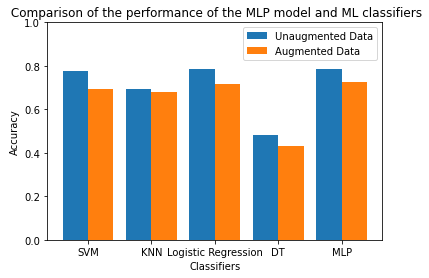

<Figure size 72x288 with 0 Axes>

In [16]:
# comaparing all the classifiers and plotting its graph
import numpy as np
import matplotlib.pyplot as plt

X = ['SVM','KNN','Logistic Regression','DT','MLP']
unaugmented_Data = [0.7771,0.6938,0.7865,0.4834,0.7867]
augmented_Data = [0.69165,0.6805,0.7152,0.4309,0.72695]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,unaugmented_Data , 0.4, label = 'Unaugmented Data')
plt.bar(X_axis + 0.2, augmented_Data, 0.4, label = 'Augmented Data')

plt.xticks(X_axis, X)
plt.ylim(0, 1)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title(" Comparison of the performance of the MLP model and ML classifiers")
plt.legend()
f = plt.figure()
f.set_figwidth(1)
plt.show()



